In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
%matplotlib inline

In [2]:
data1 = pd.read_csv('data/Ku80 siFAK CTCF.csv')
data1.head()

,n,tto n,tto,Label,Area,Mean,IntDen ku80,IntDengh2ax,Md Mean ku80,Md Mean gh2ax,CTCF ku80,CTCF gh2ax
0,1,1,ct_scramble,(13)CT-scramble-h2ax-647-ku80-564-dapi-01_Out_...,139.598,3189.763,445285.041,819736.187,600.540667,100.767,361450.7650,805669.3153
1,2,2,ct_scramble,(13)CT-scramble-h2ax-647-ku80-564-dapi-01_Out_...,94.143,3177.911,299177.284,651540.567,600.540667,100.767,242640.5840,642054.0593
2,3,3,ct_scramble,(13)CT-scramble-h2ax-647-ku80-564-dapi-01_Out_...,139.271,2614.785,364162.838,511277.406,600.540667,100.767,280524.9388,497243.4851
3,4,4,ct_scramble,(12)CT-scramble-h2ax-647-ku80-564-dapi-02_Out_...,128.381,2423.097,311080.528,206652.167,414.988667,35.153,257803.8680,202139.1897
4,5,5,ct_scramble,(12)CT-scramble-h2ax-647-ku80-564-dapi-02_Out_...,182.254,1970.033,359046.428,268825.764,414.988667,35.153,283413.0835,262418.9891


In [3]:
data1['tto'].value_counts()

ct_sifak        56
ct_scramble     54
dox_sifak       41
dox_scramble    38
Name: tto, dtype: int64

In [4]:
ct_scramble = (data1['tto'] == 'ct_scramble')
ct_sifak = (data1['tto'] == 'ct_sifak')
dox_scramble = (data1['tto'] == 'dox_scramble')
dox_sifak = (data1['tto'] == 'dox_sifak')

ct_scramble_ku80 = data1.loc[ct_scramble, ['CTCF ku80']]
ct_sifak_ku80 = data1.loc[ct_sifak, ['CTCF ku80']]
dox_scramble_ku80 = data1.loc[dox_scramble, ['CTCF ku80']]
dox_sifak_ku80 = data1.loc[dox_sifak, ['CTCF ku80']]

ct_scramble_ku80_mean = data1.loc[ct_scramble, ['CTCF ku80']].mean()
ct_sifak_ku80_mean = data1.loc[ct_sifak, ['CTCF ku80']].mean()
dox_scramble_ku80_mean = data1.loc[dox_scramble, ['CTCF ku80']].mean()
dox_sifak_ku80_mean = data1.loc[dox_sifak, ['CTCF ku80']].mean()

ct_scramble_ku80_sem = data1.loc[ct_scramble, ['CTCF ku80']].sem()
ct_sifak_ku80_sem = data1.loc[ct_sifak, ['CTCF ku80']].sem()
dox_scramble_ku80_sem = data1.loc[dox_scramble, ['CTCF ku80']].sem()
dox_sifak_ku80_sem = data1.loc[dox_sifak, ['CTCF ku80']].sem()

[188542.98562685188, 245974.5274148214, 1167168.4377999997, 1201481.8730195125]
t=-3.280, p=0.00140
**
t=-15.135, p=0.00000
****
t=-0.292, p=0.77141
NS


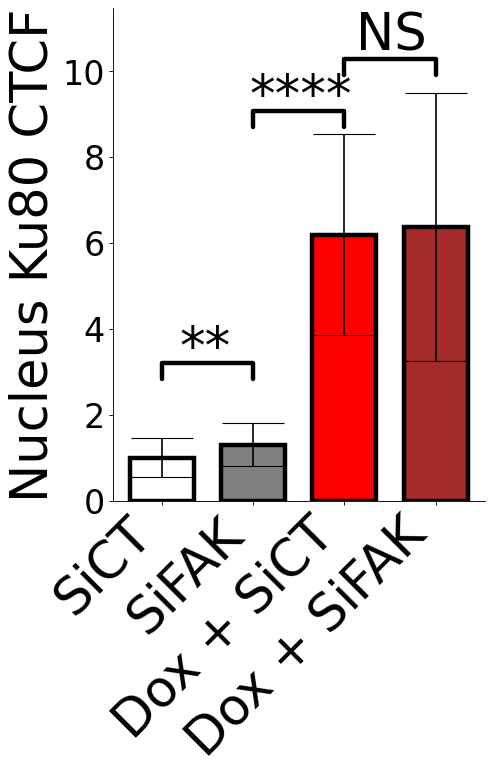

In [5]:
# dados

grupos = [ct_scramble_ku80['CTCF ku80'], ct_sifak_ku80['CTCF ku80'], dox_scramble_ku80['CTCF ku80'], dox_sifak_ku80['CTCF ku80']]
means = [ct_scramble_ku80_mean[0], ct_sifak_ku80_mean[0], dox_scramble_ku80_mean[0], dox_sifak_ku80_mean[0]]
erros = [ct_scramble_ku80['CTCF ku80'].std(), ct_sifak_ku80['CTCF ku80'].std(), dox_scramble_ku80['CTCF ku80'].std(), dox_sifak_ku80['CTCF ku80'].std()]

print(means)

nome_imagem = 'sifak ku80 ctcf std red'
Nome_imagem_pdf = nome_imagem + '.pdf' # nome da imagem salva em .pdf
Nome_imagem_png = nome_imagem + '.png' # nome da imagem salva em .jpeg

cores_barras = ['white', 'gray', 'red', 'brown']
cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 4   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'Nucleus Ku80 CTCF' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['SiCT', 'SiFAK', 'Dox + SiCT', 'Dox + SiFAK'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

means_normalizado = []
erros_normalizado = []

for mean in means:
    means_normalizado.append(mean/means[0])

for erro in erros:
    erros_normalizado.append(erro/means[0])

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 
    
    
# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,slide,hightup,texthight):
    x = (X[0]+X[1])/2
    y = 1.2* max(Y[0], Y[1])+hightup #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.4 -slide # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':10,'shrinkB':10,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(Y)+texthight), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   
    
x = [1, 2, 3, 4]  # localização da barra
width = 0.7# espessura da barra

fig, ax = plt.subplots(figsize=(6,8), dpi=80)
barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= cores_barras[0] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= cores_barras[1] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= cores_barras[2] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= cores_barras[3] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[3])

# chamando def para os traços
# print(means_normalizado[0:2])
traco(ttesting(grupos[0],grupos[1]),x[0:2],means_normalizado[0:2], -.1, 1, .5)
traco(ttesting(grupos[1],grupos[2]),x[1:3],means_normalizado[1:3], 0.14, 1, 0)
traco(ttesting(grupos[2],grupos[3]),x[2:4],means_normalizado[2:4], -0.03, 2, .2)
# traco(ttesting(grupos[0],grupos[3]),(x[0], x[3]),(means_normalizado[0], means_normalizado[3]), -0.03, 1, 1.2)


# traco(ttesting(grupos[0],grupos[3]),x[2,4],means_normalizado[1,3],-0.03, 0)

plt.ylim(0,1.8* max(means_normalizado))
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
plt.yticks(fontsize=Tamanho_ticks_Y)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X, rotation=45, ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_png,bbox_inches='tight', transparent=True)

plt.show()

[188542.98562685188, 245974.5274148214, 1167168.4377999997, 1201481.8730195125]
t=-3.280, p=0.00140
**
t=-0.292, p=0.77141
NS


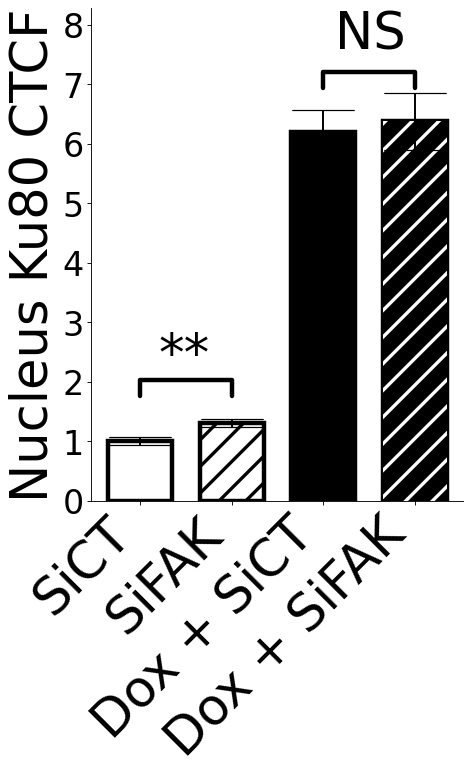

In [6]:
# dados

grupos = [ct_scramble_ku80['CTCF ku80'], ct_sifak_ku80['CTCF ku80'], dox_scramble_ku80['CTCF ku80'], dox_sifak_ku80['CTCF ku80']]
means = [ct_scramble_ku80_mean[0], ct_sifak_ku80_mean[0], dox_scramble_ku80_mean[0], dox_sifak_ku80_mean[0]]
erros = [ct_scramble_ku80['CTCF ku80'].sem(), ct_sifak_ku80['CTCF ku80'].sem(), dox_scramble_ku80['CTCF ku80'].sem(), dox_sifak_ku80['CTCF ku80'].sem()]

print(means)

nome_imagem = 'sifak ku80 ctcf sem black'
Nome_imagem_pdf = nome_imagem + '.pdf' # nome da imagem salva em .pdf
Nome_imagem_png = nome_imagem + '.png' # nome da imagem salva em .jpeg

cores_barras = ['white', 'white', 'black', 'black']
cor_envolta = ["black", 'white'] #cor da linha envolta das barras
espessura_volta = 4   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'Nucleus Ku80 CTCF' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['SiCT', 'SiFAK', 'Dox + SiCT', 'Dox + SiFAK'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

means_normalizado = []
erros_normalizado = []

for mean in means:
    means_normalizado.append(mean/means[0])

for erro in erros:
    erros_normalizado.append(erro/means[0])

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 
    
    
# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,slide,hightup,texthight):
    x = (X[0]+X[1])/2
    y = 1.2* max(Y[0], Y[1])+hightup #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.4 -slide # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':10,'shrinkB':10,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(Y)+texthight), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   
    
plt.rcParams['hatch.linewidth'] = 3 # regula a espessura das linhas dentro das barras    
    
x = [1, 2, 3, 4]  # localização da barra
width = 0.7# espessura da barra

fig, ax = plt.subplots(figsize=(6,8), dpi=80)
barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= cores_barras[0] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= cores_barras[1] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= cores_barras[2] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= cores_barras[3] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[3])

barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= 'None', hatch='',edgecolor= cor_envolta, linewidth= 0, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= 'None', hatch='/'*1,edgecolor= cor_envolta, linewidth= 0, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= 'None', hatch='',edgecolor= cor_envolta[1], linewidth= 0, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= 'None', hatch='/'*1,edgecolor= cor_envolta[1], linewidth= 0, label= labels[3])


# chamando def para os traços
# print(means_normalizado[0:2])
traco(ttesting(grupos[0],grupos[1]),x[0:2],means_normalizado[0:2], -.1, 0, .5)
# traco(ttesting(grupos[1],grupos[2]),x[1:3],means_normalizado[1:3], 0.14, 1, 0)
traco(ttesting(grupos[2],grupos[3]),x[2:4],means_normalizado[2:4], -0.03, -.9, .2)
# traco(ttesting(grupos[0],grupos[3]),(x[0], x[3]),(means_normalizado[0], means_normalizado[3]), -0.03, 1, 1.2)


# traco(ttesting(grupos[0],grupos[3]),x[2,4],means_normalizado[1,3],-0.03, 0)

plt.ylim(0,1.3* max(means_normalizado))
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
plt.yticks(fontsize=Tamanho_ticks_Y)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X, rotation=45, ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_png,bbox_inches='tight', transparent=True)

plt.show()

## Testando shapiro wilko

In [7]:
shapiro_test = stats.shapiro(grupos[0])
shapiro_test

ShapiroResult(statistic=0.8722278475761414, pvalue=3.563498466974124e-05)

In [8]:
shapiro_test = stats.shapiro(grupos[1])
shapiro_test

ShapiroResult(statistic=0.9384670853614807, pvalue=0.006683584302663803)

## Fazendo o histograma para avaliar se tem forma de sino, ou seja, é uma distribuição Gaussiana/normal.

(array([3., 2., 3., 6., 5., 4., 8., 6., 3., 6., 4., 1., 1., 1., 0., 0., 1.,
        0., 0., 2.]),
 array([ 85379.38347  , 108204.6726765, 131029.961883 , 153855.2510895,
        176680.540296 , 199505.8295025, 222331.118709 , 245156.4079155,
        267981.697122 , 290806.9863285, 313632.275535 , 336457.5647415,
        359282.853948 , 382108.1431545, 404933.432361 , 427758.7215675,
        450584.010774 , 473409.2999805, 496234.589187 , 519059.8783935,
        541885.1676   ]),
 <BarContainer object of 20 artists>)

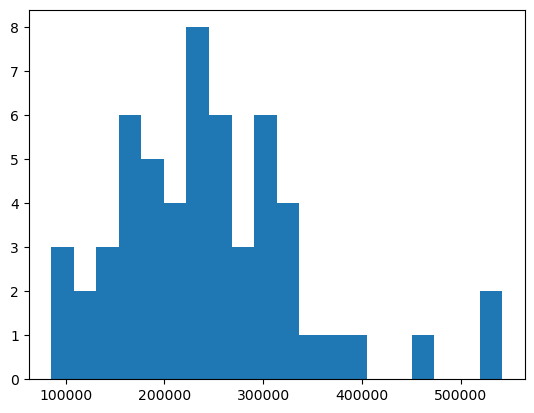

In [9]:
from matplotlib import pyplot

pyplot.hist(grupos[1],bins=20)

In [10]:
from statsmodels.graphics.gofplots import qqplot
def qqplot_graph(data):
    qqplot(data,line='s')
    pyplot.show()


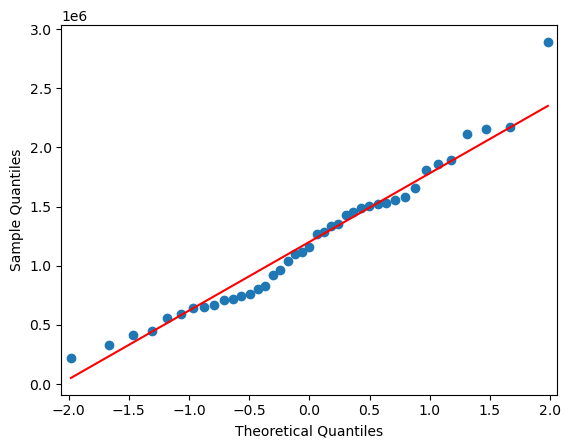

In [11]:
qqplot_graph(grupos[3])

In [12]:
from scipy.stats import shapiro
def shapiro_norm_test(data):
    stat, p = shapiro(data) # univariate observations
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Data distribution looks Gaussian (fail to reject H0)')
    else:
        print('Data distribution does not look Gaussian (reject H0)')

In [13]:
shapiro_norm_test(grupos[1])

Statistics=0.938, p=0.007
Data distribution does not look Gaussian (reject H0)


In [14]:
grupos[1].describe()

count        56.000000
mean     245974.527415
std       96156.099360
min       85379.383470
25%      179513.420150
50%      234561.987650
75%      302615.439750
max      541885.167600
Name: CTCF ku80, dtype: float64

## usando Kruskal-Wallis para avaliar os 4 grupos do silenciamento

In [15]:
stats.kruskal(grupos[0], grupos[1], grupos[2], grupos[3])

KruskalResult(statistic=136.9425174508109, pvalue=1.7244742629299307e-29)

In [16]:
from scipy.stats import f_oneway

stat, p = f_oneway(grupos[0], grupos[1], grupos[2], grupos[3])

print('Statistics=%.3f, p=%.3f' % (stat, p))
p

Statistics=121.191, p=0.000


1.9202166138365653e-43

In [17]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(grupos[0], grupos[1])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=906.000, p=0.000


In [18]:
from scipy.stats import mannwhitneyu
"""samples <30, not normally dist"""

def mannwhitneyu_stats (group1, group2):
    stat, p = mannwhitneyu(group1, group2)
    print('Teste Mann-Whitney U')
    print('Statistics=%.3f, p=%.3f' % (stat, p))